# Module 5 - Time Series

In [1]:
import pandas as pd
import numpy as np
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime

%matplotlib inline

### Numpy datetime

In [2]:
date = np.array('2015-07-04', dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [3]:
#creates 12 consecutive dates starting from July 4, 2015
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [4]:
#day-based datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [5]:
#minute-based datetime
#sets to time zone of local computer
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

### Pandas datetime

In [6]:
date = pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [7]:
#output day of the week
date.strftime('%A')

'Saturday'

In [ ]:
#create 12 consecutive dates starting from July 4, 2015
date + pd.to_timedelta(np.arange(12), 'D')

In [8]:
#make index using timestamp
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])

data = pd.Series([0,1,2,3], index=index) #a series is a singular column from a dataframe
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [9]:
#can slice date index similarly to regular index slicing
#includes ending index
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [10]:
#get rows from 2015
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [11]:
#will convert different formats into datetime
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July 2015', '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [12]:
#assigned a 'day' frequency
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [13]:
#calculate # of days between 07-03-2015 and each date
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
#create days between start date and end date
#default frequency is 'day'
pd.date_range('2015-07-03', '2015-07-10')

In [ ]:
#create days from start date with periods (how many)
pd.date_range('2015-07-03', periods=8)

In [ ]:
#make range using hourly frequency
#default start at 00:00 (midnight)
pd.date_range('2015-07-03', periods=8, freq='H')

In [ ]:
#create period frequency by month
pd.period_range('2015-07', periods=8, freq='M')

In [ ]:
#create only hour frequencies (no date attached)
#seconds also included
pd.timedelta_range(0, periods=10, freq='H')

In [ ]:
#create 2 hour 30 minute intervals
pd.timedelta_range(0, periods=9, freq='2H30T')

In [14]:
#create business day offsets
from pandas.tseries.offsets import BDay

pd.date_range('2015-07-01', periods=5, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

### Visualize time series data

In [15]:
#make dates the index
#format dates as we load the data
data = pd.read_csv('datasets/FremontBridgeBicycle.csv', index_col="Date", parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [16]:
data.describe()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,53271.000000,53271.000000
mean,57.434401,54.368549
std,82.795998,71.282743
min,0.000000,0.000000
25%,7.000000,7.000000
50%,29.000000,30.000000
75%,70.000000,72.000000
max,717.000000,698.000000


In [17]:
#rename columns with shorter name
#create a new column 'Total' with combined values of west and east columns
data.columns = ['East', 'West']
data['Total'] = data.eval('East + West')

#data['Total'] = data['East'] + data['West']

In [19]:
data.head()

,East,West,Total
Date,,,
2012-10-03 00:00:00,9.0,4.0,13.0
2012-10-03 01:00:00,6.0,4.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,3.0,2.0,5.0
2012-10-03 04:00:00,1.0,6.0,7.0


Text(0, 0.5, 'Hourly Bicycle Count')

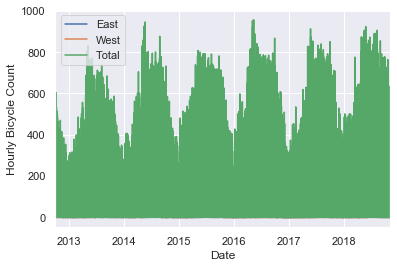

In [20]:
#bar plot of data
data.plot()
plt.ylabel('Hourly Bicycle Count')

In [21]:
#hourly intervals are too narrow to make sense of data
#aggregate as weekly data instead
weekly = data.resample('W').sum()
weekly.head()

,East,West,Total
Date,,,
2012-10-07,6995.0,7297.0,14292.0
2012-10-14,8116.0,8679.0,16795.0
2012-10-21,7563.0,7946.0,15509.0
2012-10-28,6536.0,6901.0,13437.0
2012-11-04,5786.0,6408.0,12194.0


Text(0, 0.5, 'Weekly Bicycle Count')

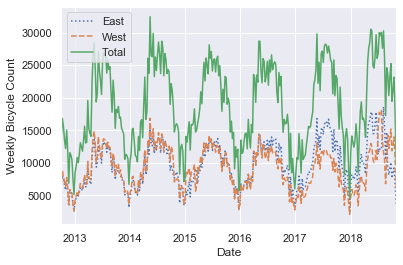

In [22]:
weekly.plot(style=[':', '--', '-']) #line styles for each feature
plt.ylabel('Weekly Bicycle Count')

People tend to bike more in the summers than in the winters

In [24]:
#see what an average day looks like
by_time = data.groupby(data.index.time).mean()
by_time



,East,West,Total
00:00:00,6.741892,5.295495,12.037387
01:00:00,3.387387,2.924775,6.312162
02:00:00,2.133634,2.081264,4.214898
03:00:00,1.417568,1.631081,3.048649
04:00:00,2.942342,3.648198,6.590541
05:00:00,9.600450,16.571622,26.172072
06:00:00,34.138288,57.562162,91.700450
07:00:00,78.095045,150.670721,228.765766
08:00:00,118.479279,202.232432,320.711712
09:00:00,78.788644,109.425868,188.214511


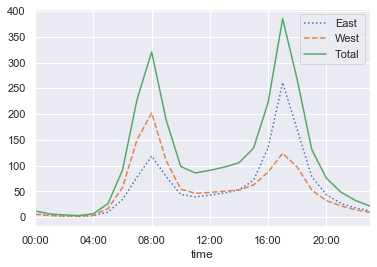

In [25]:
hourly_ticks = 4*60*60*np.arange(6) #6 intervals of 4 hours
by_time.plot(xticks=hourly_ticks, style=[':','--','-'])

Bike usage peaks around 8am and 5pm

In [26]:
#What does bike usage look like by day of the week?
by_weekday = data.groupby(data.index.dayofweek).mean()

by_weekday

,East,West,Total
Date,,,
0,68.231730,62.413118,130.644848
1,73.011307,67.605180,140.616487
2,72.623821,66.558176,139.181997
3,68.074395,63.418638,131.493034
4,61.687221,57.070076,118.757297
5,30.073475,32.284043,62.357518
6,28.276996,31.181113,59.458109


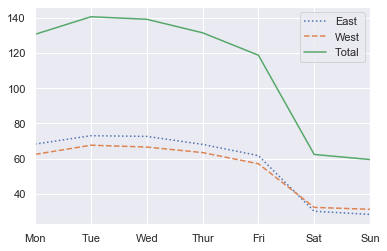

In [27]:
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':','--','-'])

Bike usage is highest during weekdays and drops off on weekends

In [28]:
#set conditions to show hourly trend on weekdays vs weekends
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()

In [29]:
by_time

East        West       Total
Weekday 00:00:00    5.616646    4.600252   10.216898
        01:00:00    2.625473    2.350567    4.976040
        02:00:00    1.660782    1.707440    3.368222
        03:00:00    1.293190    1.497478    2.790668
        04:00:00    3.284994    4.342371    7.627364
        05:00:00   12.124842   21.496217   33.621059
        06:00:00   44.283102   77.169609  121.452711
        07:00:00  103.431274  204.063682  307.494956
        08:00:00  154.981084  270.314628  425.295712
        09:00:00   95.291483  135.668139  230.959621
        10:00:00   44.016404   54.544479   98.560883
        11:00:00   33.926814   39.879495   73.806309
        12:00:00   36.225237   39.849842   76.075079
        13:00:00   40.134300   42.194199   82.328499
        14:00:00   48.225725   45.167087   93.392812
        15:00:00   74.413619   59.441362  133.854981
        16:00:00  165.027112   96.728878  261.755990
        17:00:00  345.211223  151.732030  496.943253
        18:00:00  221.565574  119.021438  340.587011
        19:00:00   98.963430   62.368852  161.332282
        20:00:00   52.647541   37.052333   89.699874
        21:00:00   31.238335   24.926860   56.165195
        22:00:00   20.177806   16.027112   36.204918
        23:00:00   13.071879    9.829130   22.901009
Weekend 00:00:00    9.556782    7.034700   16.591483
        01:00:00    5.293375    4.361199    9.654574
        02:00:00    3.325914    3.023847    6.349762
        03:00:00    1.728707    1.965300    3.694006
        04:00:00    2.085174    1.911672    3.996845
        05:00:00    3.285489    4.252366    7.537855
        06:00:00    8.760252    8.512618   17.272871
        07:00:00   14.714511   17.104101   31.818612
        08:00:00   27.167192   31.919558   59.086751
        09:00:00   37.531546   43.820189   81.351735
        10:00:00   43.949527   53.728707   97.678233
        11:00:00   53.477918   62.343849  115.821767
        12:00:00   59.611987   68.190852  127.802839
        13:00:00   63.498423   70.801262  134.299685
        14:00:00   64.481073   71.526814  136.007886
        15:00:00   64.164038   70.082019  134.246057
        16:00:00   59.408517   64.564669  123.973186
        17:00:00   51.364353   53.854890  105.219243
        18:00:00   39.477918   42.558360   82.036278
        19:00:00   27.676656   28.028391   55.705047
        20:00:00   21.219243   19.790221   41.009464
        21:00:00   15.558360   13.970032   29.528391
        22:00:00   12.403785   10.301262   22.705047
        23:00:00   10.268139    7.712934   17.981073

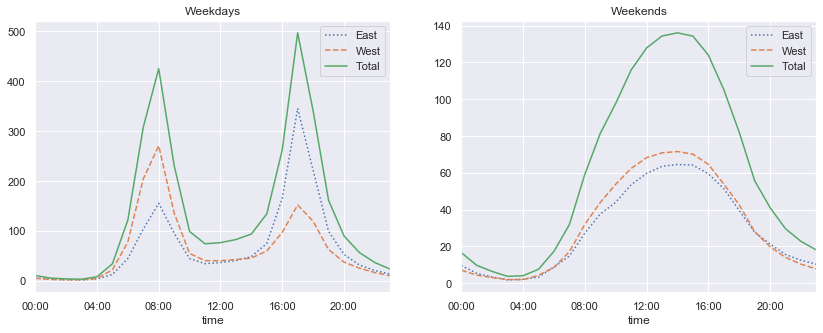

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);